In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class LogisticRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_pred)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_pred)
        class_pred = [1 if y > 0.5 else 0 for y in y_pred]  # Convert probabilities to binary labels
        return class_pred

    def accuracy(self, y_test, y_pred):
        return np.mean(y_test == y_pred)
        
    def mean_squarred_error(self,y_test,y_pred):
        mse = np.mean((y_test - y_pred )**2)
        return mse

In [3]:
data = pd.read_csv("advertising.csv")
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [4]:
X = data.drop(["Timestamp", "Clicked on Ad"], axis=1)
X.shape

(1000, 8)

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X["Ad Topic Line"] = le.fit_transform(X["Ad Topic Line"])
X["City"] = le.fit_transform(X["City"])
X["Country"] = le.fit_transform(X["Country"])
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country
0,68.95,35,61833.90,256.09,91,961,0,215
1,80.23,31,68441.85,193.77,464,903,1,147
2,69.47,26,59785.94,236.50,566,111,0,184
3,74.15,29,54806.18,245.89,903,939,1,103
4,68.37,35,73889.99,225.58,766,805,0,96
...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,345,126,1,116
996,51.30,45,67782.17,134.42,359,488,1,26
997,51.63,51,42415.72,120.37,263,798,1,140
998,55.55,19,41920.79,187.95,641,935,0,85


In [6]:
Y = data["Clicked on Ad"]
Y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
model = LogisticRegression()
model.fit(X_train,Y_train)

In [10]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

training_accuracy = model.accuracy(Y_train, y_train_pred)
test_accuracy = model.accuracy(Y_test, y_test_pred)

print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9637
Test Accuracy: 0.9300


In [11]:
mse = model.mean_squarred_error(Y_test,y_test_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.07


In [12]:
from sklearn.metrics import confusion_matrix
cf1 = confusion_matrix(Y_train,y_train_pred)
cf2 = confusion_matrix(Y_test,y_test_pred)

print(f"Confusion Matrix: {cf1}")
print(f"Confusion Matrix: {cf2}")

Confusion Matrix: [[410   1]
 [ 28 361]]
Confusion Matrix: [[88  1]
 [13 98]]


In [13]:
from sklearn.metrics import precision_score,recall_score,f1_score
pre = precision_score(Y_test,y_test_pred)
rec = recall_score(Y_test,y_test_pred)
fs = f1_score(Y_test,y_test_pred)

print(f"Precision: {pre}")
print(f"Recall: {rec}")
print(f"F1 Score: {fs}")

Precision: 0.98989898989899
Recall: 0.8828828828828829
F1 Score: 0.9333333333333333


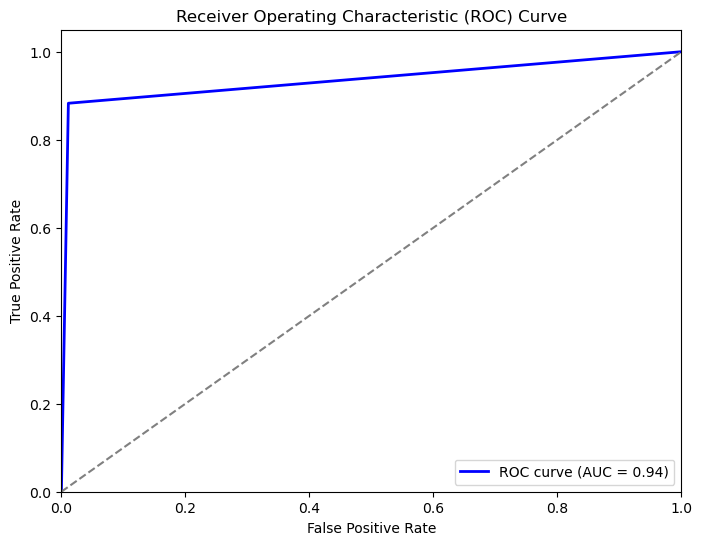

In [14]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(Y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


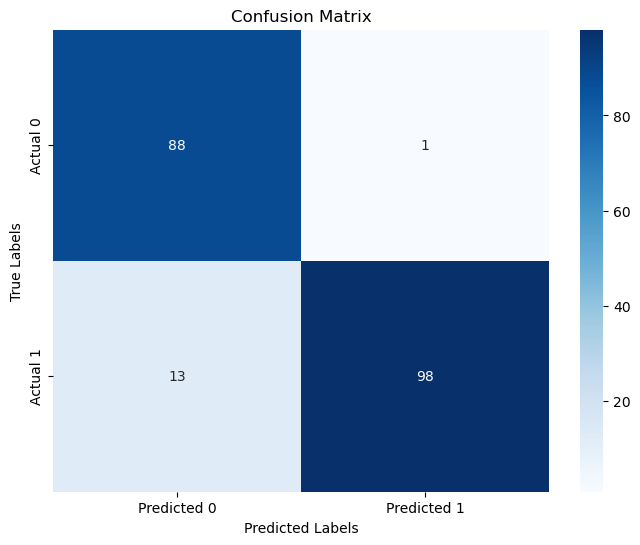

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(cf2, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Predicted 0", "Predicted 1"], 
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

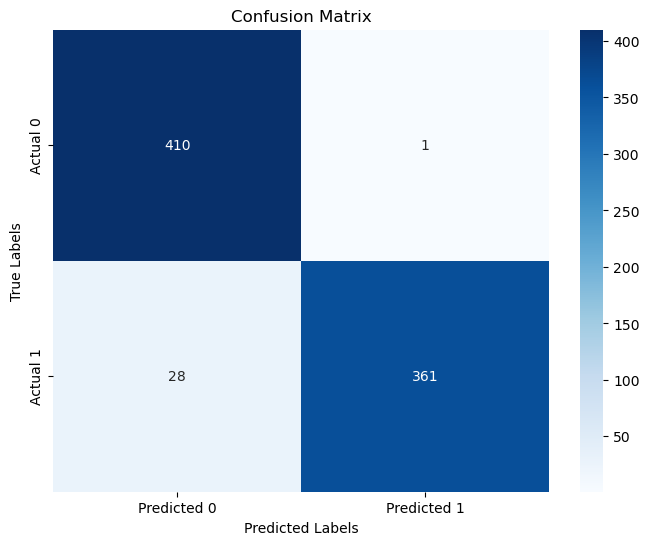

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(cf1, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Predicted 0", "Predicted 1"], 
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()